
# Problem Statement

An education company named 'X Education' that sells online courses to industry professionals, is targeting to improve its poor lead conversion rate of 30% to around 80% in the future. In order to achieve this target set by its CEO, 'X Education' needs a model to identify the most promising leads or 'Hot Leads'. The model is to be built to assign a score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

<br>
 
**Background:**  At present, 'X Education' markets its courses on several websites and search engines like Google. Interested professionals land on their website and browse for courses, fill up a form indicating interest in courses or watch some videos. When anyone fills up a form providing their email address or phone number, they are classified as a lead. The company also gets leads through referrals. Once these leads are acquired, the sales team start making calls, writing emails, etc. to convert these leads, to enroll for courses and become paying customers. 
To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. Once they successfully identify this set of leads, the lead conversion rate should go up as the sales team can focus more on communicating with the potential customers and nurturing those leads (i.e. educating the leads about the product, frequently communicating etc.) rather than making calls to everyone.


**Data:**  We have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t. We need to be mindful of the categorical variables having a level 'Select' which means no input was provided by the leads for those fields and are to be treated as Null value.

## Business Objective

   - To **build a logistic regression model to assign a lead score** between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
   - The model should be able to **adjust to company's requirement changes** in the future and handle them as well. 


<h2>Approach (or the broad steps are) <span class="tocSkip"></span></h2>
<ul></ul>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-and-Understanding-Data" data-toc-modified-id="Reading-and-Understanding-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading and Understanding Data</a></span></li>

<li><span><a href="#Data-Quality-Checks-and-Data-Cleaning" data-toc-modified-id="Data-Quality-Checks-and-Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Quality Checks and Data Cleaning</a></span></li>
    
<li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li>
    
<li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preparation</a></span></li>
    
<li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Building</a></span></li>


<li><span><a href="#Model Evaluation" data-toc-modified-id="Model Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Evaluation</a></span></li>
    
<li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li></div>

## 1. Reading and Understanding Data

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score


# display settings
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# importing data and reading the data

lead = pd.read_csv("Leads.csv")

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
# checking last rows

lead.tail()  

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.00,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.00,17.00,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.00,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,19.00,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.00,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.00,20.00,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.00,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.00,16.00,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.00,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.00,18.00,No,Yes,Modified


In [4]:
# checking the number of rows and columns in the dataset

lead.shape

(9240, 37)

##### Observation : 
1. Dataset loaded properly, no header/footer row, no total/summary rows or column. 
2. A total of 37 columns and 9240 datapoints are present.

In [5]:
# inspecting the columns and their data-types

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# checking the summary statistics of the numerical columns

lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


##### Observation:

1. Out of 37, 17 columns have null values. 
2. There are 7 numeric and 30 attributes with dtype as object. Some columns may be converted to appropriate data types.
3. Prospect ID and Lead Number are both unique identifiers. We can drop one of them.
4. Some of the numerical columns may have outliers such as 'TotalVisits', 'Page Views Per Visit' etc.

## 2. Data Quality Checks and Data Cleaning

### 2.1. Checking for duplicates, invalid entries and unwanted columns

#### 2.1.1. Checking for duplicate entries

Checking if there are duplicate rows, or rows with only null values.

In [7]:
# making a copy of the dataset and checking for duplicate rows, if duplicates found, we can drop them from the original dataframe

lead_check_dup = lead.copy()

lead_check_dup.drop_duplicates(subset=None, inplace=True)
lead_check_dup.shape

(9240, 37)

In [8]:
# checking row-wise null count

lead.isnull().sum(axis=1).sort_values(ascending=False)

4619    13
5322    13
5468    13
5457    13
5454    13
        ..
7631     0
7627     0
7624     0
7622     0
9239     0
Length: 9240, dtype: int64

##### Observation:

1. The shape of original dataframe and that of the dataframe after removing duplicates is the same, so there are no duplicates.
2. The are no rows with all null values. Maximum null values in a row is 13 out of 37.

#### 2.1.2. Checking for entries with abnormalities/inconsistencies

Listing and taking a look at the unique values in each column (except the two columns with unique identifiers 'Prospect ID' and 'Lead Number') can help us identify any inconsistent, out-of-range, invalid or abnormal entries.

In [9]:
# listing all the unique values for every column to check for invalid/incorrect values

select = []
for col in lead.columns[2:]:
    print(col, end=': ')
    print(lead[col].unique(), '\n')

Lead Origin: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form'] 

Lead Source: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM'] 

Do Not Email: ['No' 'Yes'] 

Do Not Call: ['No' 'Yes'] 

Converted: [0 1] 

TotalVisits: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.] 

Total Time Spent on Website: [   0  674 1532 ...  603  483  927] 

Page Views Per Visit: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75 

##### Observation:

1. There doesn't seem to be any noticeable inconsistent/invalid entries.
2. Some categorical columns have 'Select' values in their entries. 'Select' appears when someone has not selected anything from the dropdown in the form, and hence we may treat them as missing/null value.
3. For the column Lead Source: the entries 'WeLearn' and 'welearnblog_Home' seems similar.
4. Some columns have no variance and may be dropped as they may not help significantly in analysis, such as 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content' and 'I agree to pay the amount through cheque'.

#### 2.1.3. Dropping columns with no variance

From the above observation, we can see that some of the columns have no variance and so we can drop them since these columns will have no significant impact in our analysis.


In [10]:
# dropping columns with no variance

drop_col = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

lead.drop(drop_col, axis=1, inplace=True)
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

#### 2.1.4. Unwanted columns

The unique identifier columns 'Prospect ID' and 'Lead Number' will have no bearance on the target variable, hence dropping them.

In [11]:
# dropping columns with no significance

lead.drop(['Prospect ID','Lead Number' ], axis=1, inplace=True)

### 2.2. Checking and handling missing entries

As we observed from lead.info() earlier that there are columns having less that 9240 entries indicating the presence of null values. Let us look into it in details.

First, let us extract the columns with entries having values as 'Select' - and replace them with null values since in effect 'Select' is same as missing values.

#### 2.2.1. Replacing 'Select' values with null values

In [12]:
# sub-setting categorical or non-numeric columns

lead_obj = lead.select_dtypes(include='object')

# finding the columns that have entries as 'Select'

select = lambda x: x.str.contains('Select', na=False)
sel_col = lead_obj.columns[lead_obj.apply(select).any()].tolist()
print (sel_col)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [13]:
# replace 'Select' values with null

lead[sel_col] = lead[sel_col].replace('Select', np.NaN)
lead.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Last Notable Activity                               0
Total Time Spent on Website 

##### Observation:
There are four columns that contains `Select`:  'Specialization', 'How did you hear about X Education', 'Lead Profile', 'City'.

As `Select` is effectively null value, we replaced it with NaN.

#### 2.2.2. Checking columns with high null values and dropping as required

In [14]:
# calculating percentage of null values in each column

round(100*(lead.isnull().sum()/(lead.shape[0])), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [15]:
# checking the number of missing values in each column

lead.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Last Notable Activity                               0
Total Time Spent on Website 

##### Observation: 
1. There are quite a few columns with a very high percentage of missing data and the data seems to be MAR or MCAR. Since there are no other reliable supplementary source of data from where we can get the missing data, let us drop columns with very high missing values. Since we have more than 9000 entries in the dataset, let us drop columns having missing values say missing values > 4000 entries.
2. There are some columns with missing values, that do not seem relevant for our analysis such as Country, City etc., we can check and drop them.

**Dropping columns that have null values > 4000 entries**

In [16]:
# dropping all the columns with more than 4000 missing values 

for col in lead.columns:
    if lead[col].isnull().sum() > 4000:
        lead.drop(col, 1, inplace=True)

In [17]:
# checking the percentage of missing values in each column again

round(100*(lead.isnull().sum().sort_values(ascending=False)/len(lead.index)), 2)

City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Last Notable Activity                            0.00
A free copy of Mastering The Interview           0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums          

##### Observation:
The following columns still have high null values: 
   - `City`
   - `Specialization`
   - `Tags`
   - `What matters most to you in choosing a course`, 
   - `What is your current occupation` and 
   - `Country`
   
Let us inspect these columns individually to decide how to handle these missing entries.


#### 2.2.2.(a) Columns `Country` and `City`:

Since 'X Education' sells courses online to industry professionals, it bears no significance to the conversion probability where the lead comes from, that is from which Country and City, and hence we can drop these two columns.

In [18]:
# dropping the columns 'City' and Country' as these have no apparent impact on the target variable

lead.drop(['City','Country'], axis = 1, inplace = True)

lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### 2.2.2.(b) Column `What matters most to you in choosing a course`:

In [19]:
# checking the values in the 'What matters most to you in choosing a course' column

lead['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100

Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: What matters most to you in choosing a course, dtype: float64

##### Observation:
We can observe that 70% of the entries have value 'Better Career Prospects' and 29% have NaN value. The other values have very less entries. So let us drop this column as well.

In [20]:
# dropping the column 'What matters most to you in choosing a course'

lead.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

#### 2.2.2.(c) Column `What is your current occupation`:

In [21]:
# checking the values in the 'What is your current occupation' column

lead['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: What is your current occupation, dtype: float64

##### Observation:

Although the column `What is your current occupation` has about 29%  null values, it might be significant for our analysis. So let's just drop the null rows for the column instead of dropping the whole column.

In [22]:
# dropping the rows from the column 'What is your current occupation'

lead = lead[~pd.isnull(lead['What is your current occupation'])]

#### 2.2.2.(d) Column `Tags`:

In [23]:
# checking the values in the 'Tags' column

lead['Tags'].value_counts(normalize = True, dropna = False) * 100

Will revert after reading the email                 31.63
Ringing                                             18.37
NaN                                                 11.36
Interested in other courses                          7.34
Already a student                                    7.10
Closed by Horizzon                                   5.47
switched off                                         3.66
Busy                                                 2.84
Not doing further education                          2.21
Lost to EINS                                         1.92
Interested  in full time MBA                         1.79
Graduation in progress                               1.69
invalid number                                       1.27
Diploma holder (Not Eligible)                        0.96
wrong number given                                   0.72
opp hangup                                           0.50
number not provided                                  0.41
in touch with 

##### Observation:

The column `Tags` seems like being filled by the Sales representative about particular leads. As this is describing the lead and not a factor that impacting lead, let us drop this column as well.

In [24]:
# dropping the column 'Tags'

lead.drop(['Tags'], axis = 1, inplace=True)

#### 2.2.2.(e) Column `Specialization`:

In [25]:
# checking the values in the 'Specialization' column

lead['Specialization'].value_counts(normalize = True, dropna = False) * 100

NaN                                 29.73
Finance Management                  11.63
Marketing Management                10.35
Human Resource Management           10.32
Operations Management                6.03
Business Administration              4.79
Supply Chain Management              4.24
IT Projects Management               4.24
Banking, Investment And Insurance    4.11
Media and Advertising                2.47
Travel and Tourism                   2.29
International Business               2.11
Healthcare Management                1.91
Hospitality Management               1.42
E-COMMERCE                           1.24
Retail Management                    1.19
Rural and Agribusiness               0.89
E-Business                           0.66
Services Excellence                  0.38
Name: Specialization, dtype: float64

##### Observation:

Although the column `Specialization` has about 29% null values, it might be significant for our analysis. However, if we drop the rows with null values then we would lose almost a third of the datapoints. Hence, let us treat the null values as a separate category and continue with our analysis. Let us convert the NaN values as 'Unknown'.

In [26]:
# Drop the null values rows in the column 'Specialization'

lead['Specialization'] = lead['Specialization'].replace(np.NaN, 'Unknown')

In [27]:
# checking the number of missing values in the remaining columns

lead.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Last Notable Activity                       0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
Total Time Spent on Website                 0
Specialization                              0
A free copy of Mastering The Interview      0
What is your current occupation             0
Search                                      0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Lead Origin                                 0
dtype: int64

##### Observation: 

Out of the remaining columns, `TotalVisits`, `Page Views Per Visit`, `Last Activity` and `Lead Source` have a small number of missing value. We can drop the rows with missing values.

In [28]:
# dropping the rows with null values from the columns 'TotalVisits', 'Page Views Per Visit', 'Last Activity' and 'Lead Source'

lead = lead[~pd.isnull(lead['TotalVisits'])]
lead = lead[~pd.isnull(lead['Page Views Per Visit'])]
lead = lead[~pd.isnull(lead['Last Activity'])]
lead = lead[~pd.isnull(lead['Lead Source'])]

In [29]:
# checking that no missing values are left

lead.isnull().sum().sort_values(ascending=False)

Last Notable Activity                     0
Last Activity                             0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
A free copy of Mastering The Interview    0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Lead Origin                               0
dtype: int64

In [30]:
print(len(lead.index))
print(len(lead.index)/9240)

6391
0.6916666666666667


##### Observation:

All missing values have been handled and we are left with 69% of the original data which is good enough to proceed with further analysis.

In [31]:
# checking the value_counts() for unique values in the non-numerical columns to understand class imbalance

lead_obj = lead.select_dtypes(include='object')
for col in lead_obj:
    print(lead_obj[col].value_counts(ascending=False), '\n\n')


Landing Page Submission    3643
API                        2140
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64 


Google               2048
Direct Traffic       1891
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
WeLearn                 1
testone                 1
Press_Release           1
Pay per Click Ads       1
Name: Lead Source, dtype: int64 


No     5945
Yes     446
Name: Do Not Email, dtype: int64 


No     6389
Yes       2
Name: Do Not Call, dtype: int64 


Email Opened                    2455
SMS Sent                        2190
Page Visited on Website          429
Olark Chat Conversation          428
Converted to Lead                296
Email Bounced                    183
Email Link Clicked               178
Form Sub

##### Observation:

Class imbalance apparent in some of the columns. Also, there are data type mismatch for Do Not Email, Do Not Call, Last Activity, Specialization, What is your current occupation, 

In [32]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6391 non-null   object 
 1   Lead Source                             6391 non-null   object 
 2   Do Not Email                            6391 non-null   object 
 3   Do Not Call                             6391 non-null   object 
 4   Converted                               6391 non-null   int64  
 5   TotalVisits                             6391 non-null   float64
 6   Total Time Spent on Website             6391 non-null   int64  
 7   Page Views Per Visit                    6391 non-null   float64
 8   Last Activity                           6391 non-null   object 
 9   Specialization                          6391 non-null   object 
 10  What is your current occupation         6391 non-null   obje

## 3. Exploratory Data Analysis

In [33]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6391 non-null   object 
 1   Lead Source                             6391 non-null   object 
 2   Do Not Email                            6391 non-null   object 
 3   Do Not Call                             6391 non-null   object 
 4   Converted                               6391 non-null   int64  
 5   TotalVisits                             6391 non-null   float64
 6   Total Time Spent on Website             6391 non-null   int64  
 7   Page Views Per Visit                    6391 non-null   float64
 8   Last Activity                           6391 non-null   object 
 9   Specialization                          6391 non-null   object 
 10  What is your current occupation         6391 non-null   obje

#### Categorical columns:

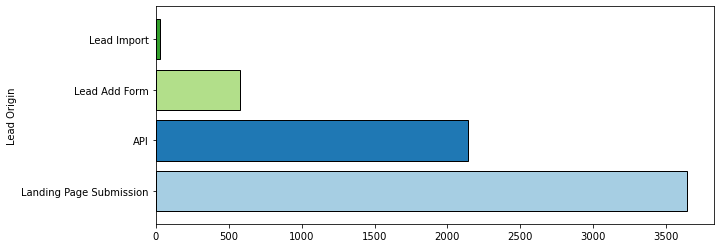

In [34]:
# Column 'Lead Origin'

plt.figure(figsize = (10,4))
lead.groupby('Lead Origin')['Lead Origin'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(lead))))
plt.show()

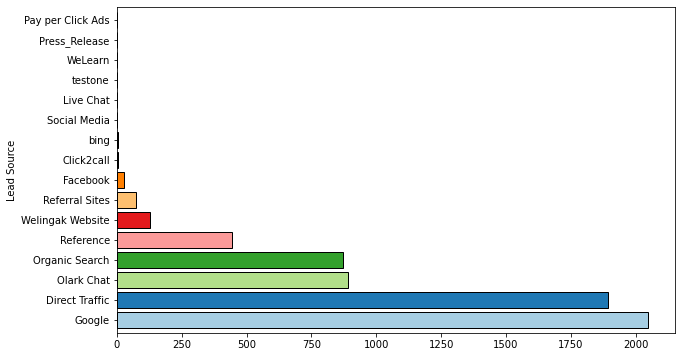

In [35]:
# Column 'Lead Source'

plt.figure(figsize = (10,6))
lead.groupby('Lead Source')['Lead Source'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(lead))))
plt.show()

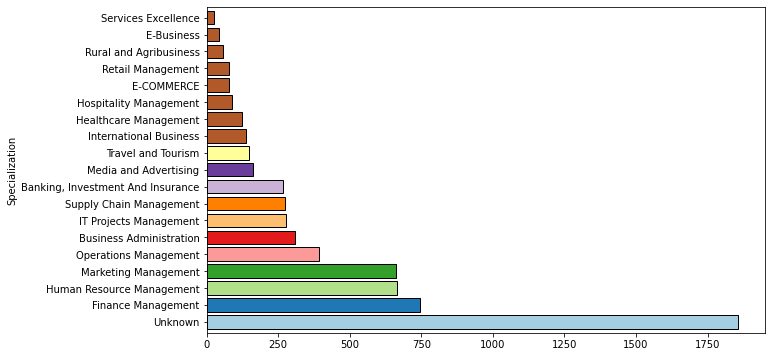

In [36]:
# Column 'Specialization'

plt.figure(figsize = (10,6))
lead.groupby('Specialization')['Specialization'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(lead))))
plt.show()

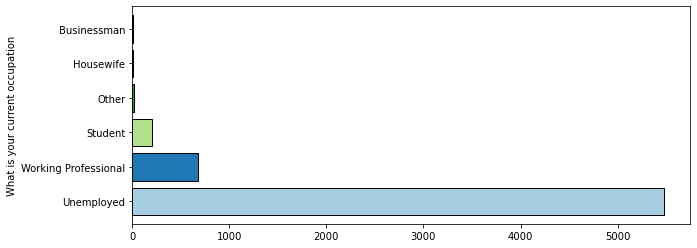

In [37]:
# Column 'Occupation'

plt.figure(figsize = (10,4))
lead.groupby('What is your current occupation')['What is your current occupation'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(lead))))
plt.show()

#### Numerical columns:

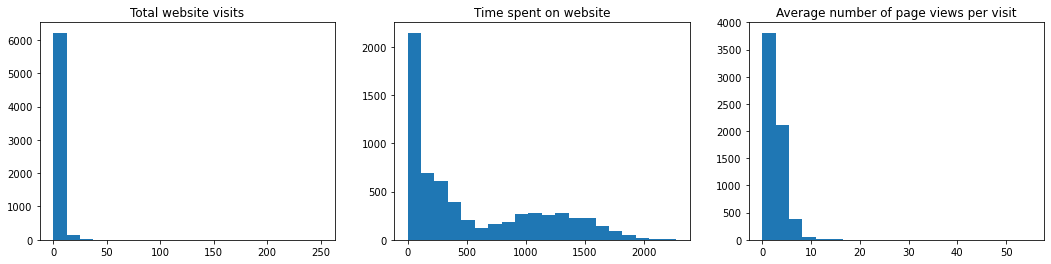

In [38]:
# See distribution of each of these columns
fig = plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
plt.hist(lead.TotalVisits, bins = 20)
plt.title('Total website visits')

plt.subplot(1, 3, 2)
plt.hist(lead['Total Time Spent on Website'], bins = 20)
plt.title('Time spent on website')

plt.subplot(1, 3, 3)
plt.hist(lead['Page Views Per Visit'], bins = 20)
plt.title('Average number of page views per visit')

plt.show()

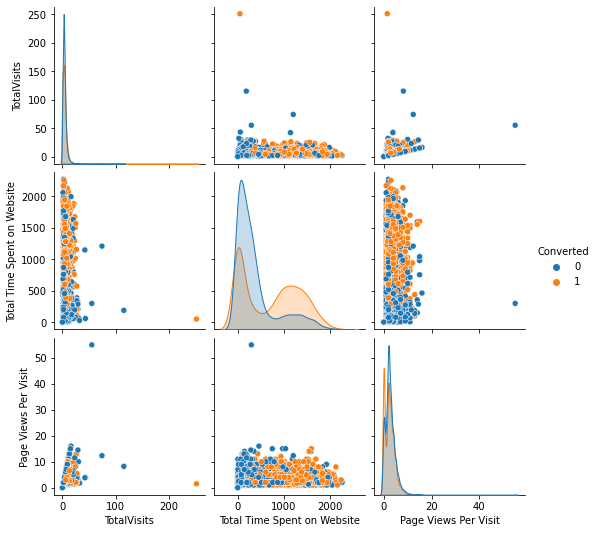

In [39]:

sns.pairplot(lead,diag_kind='kde',hue='Converted')
plt.show()

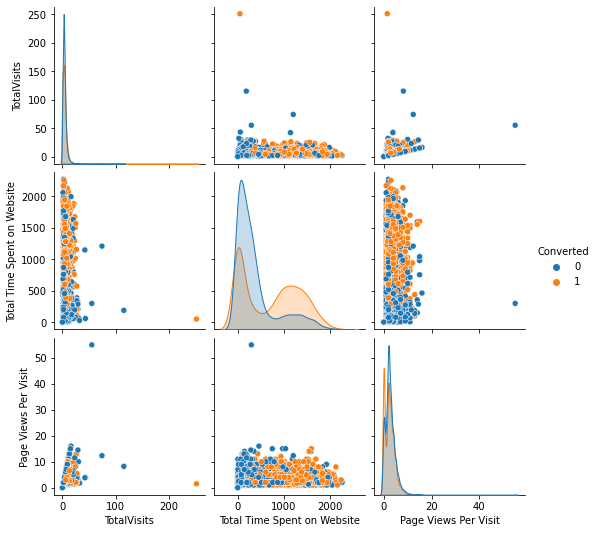

In [40]:
plot = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(plot, diag_kind='kde', hue='Converted')
plt.show()

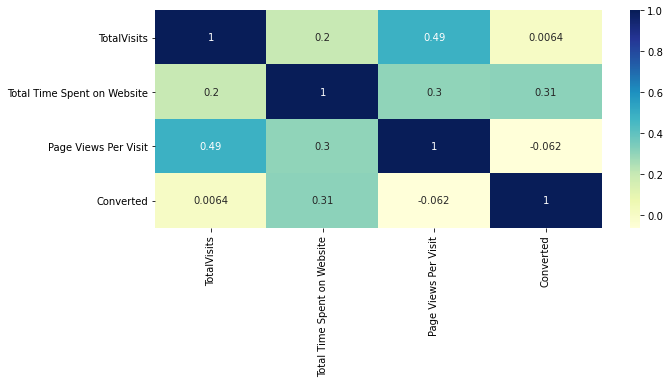

In [41]:
# Heatmap
plt.figure(figsize = (10,4))
sns.heatmap(lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']].corr(), cmap="YlGnBu", annot = True)
plt.show()

In [42]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedplot = pd.DataFrame(pt.fit_transform(plot))
transformedplot.columns = plot.columns
transformedplot.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.54,-1.53,-1.54,-0.96
1,0.69,0.64,0.23,-0.96
2,-0.22,1.26,-0.02,1.04
3,-0.72,0.15,-0.63,-0.96
4,-0.22,1.21,-0.63,1.04


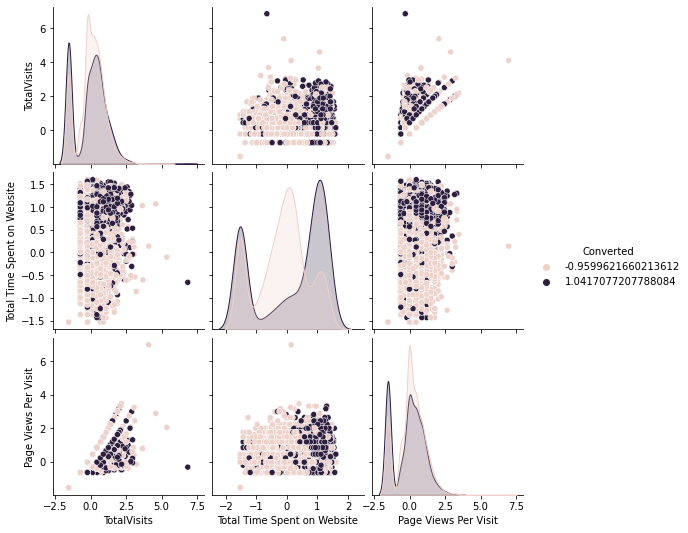

In [43]:
sns.pairplot(transformedplot, diag_kind='kde', hue='Converted')
plt.show()

## 4. Data Preparation

#### Dummy variable creation
The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [44]:
# Check the columns which are of type 'object'

temp = lead.loc[:, lead.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
lead = pd.concat([lead, dummy], axis=1)

In [46]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Unknown' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(lead['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Unknown'], 1)
lead = pd.concat([lead, dummy_spl], axis = 1)

In [47]:
# Drop the variables for which the dummy variables have been created

lead = lead.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [48]:
# Let's take a look at the dataset again

lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.00,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.00,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.00,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.00,1428,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Test-Train Split
The next step is to split the dataset into training an testing sets.

In [49]:
# Put all the feature variables in X

X = lead.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.00,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.00,674,2.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.00,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.00,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.00,1428,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# Put the target variable in y

y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [51]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [52]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
533,0.01,0.36,0.19,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
846,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7546,0.04,0.37,0.56,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8631,0.02,0.40,0.31,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7824,0.00,0.08,0.06,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Looking at the correlations
Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

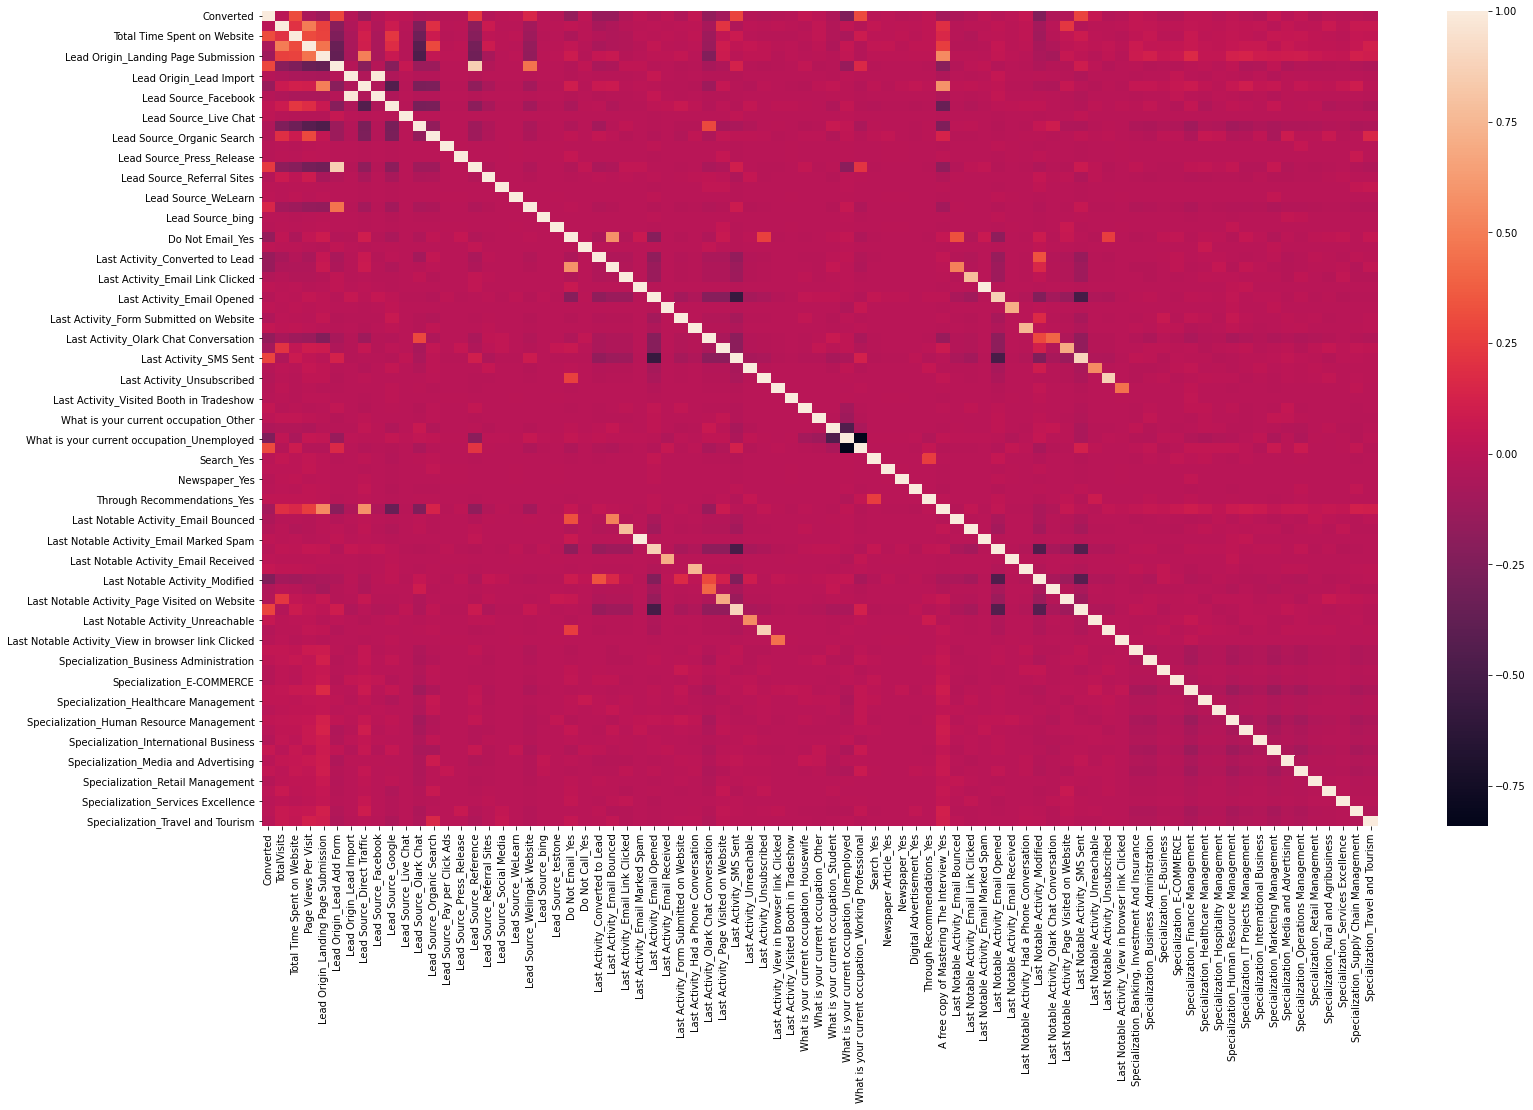

In [53]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(lead.corr())
plt.show()

## 4. Model Building
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.



In [54]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [55]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [56]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 51),
 ('Lead Source_Direct Traffic', False, 36),
 ('Lead Source_Facebook', False, 46),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Live Chat', False, 49),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Pay per Click Ads', False, 65),
 ('Lead Source_Press_Release', False, 59),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 41),
 ('Lead Source_Social Media', False, 42),
 ('Lead Source_WeLearn', False, 47),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 56),
 ('Lead Source_testone', False, 63),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 43),
 ('Last Activity_Converted to Lead', False, 8),
 ('Last Activity_Email Bounced', True, 

In [57]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [58]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [59]:
# Import statsmodels

import statsmodels.api as sm

In [60]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4457
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2058.1
Date:                Mon, 06 Sep 2021   Deviance:                       4116.3
Time:                        12:11:56   Pearson chi2:                 4.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0400      0.105     -9.874      0.000      -1.246      -0.834
TotalVisits                                             11.7828      3.007      3.918      0.000       5.888      17.677
Total Time Spent on Website                              4.5156      0.188     24.062      0.000       4.148       4.883
Lead Origin_Lead Add Form                                4.0461      0.247     16.409      0.000       3.563       4.529
Lead Source_Olark Chat                                   1.5002      0.125     11.998      0.000       1.255       1.745
Lead Source_Welingak Website                             1.8252      0.758      2.408      0.016       0.339       3.311
Do Not Email_Yes                                        -1.4589      0.224     -6.506      0.000      -1.898      -1.019
Last Activity_Email Bounced                             -1.1500      0.438     -2.624      0.009      -2.009      -0.291
Last Activity_Had a Phone Conversation                   1.7592      0.719      2.446      0.014       0.350       3.169
What is your current occupation_Working Professional     2.4456      0.184     13.299      0.000       2.085       2.806
Last Notable Activity_Email Link Clicked                -1.4470      0.288     -5.029      0.000      -2.011      -0.883
Last Notable Activity_Email Opened                      -1.0423      0.098    -10.627      0.000      -1.235      -0.850
Last Notable Activity_Modified                          -1.6160      0.104    -15.566      0.000      -1.819      -1.412
Last Notable Activity_Olark Chat Conversation           -2.1161      0.378     -5.605      0.000      -2.856      -1.376
Last Notable Activity_Page Visited on Website           -1.5439      0.235     -6.562      0.000      -2.005      -1.083
Last Notable Activity_Unreachable                        2.2228      1.073      2.071      0.038       0.119       4.326
========================================================================================================================
"""

Variables  have a p-value less than 0.05. But first, let's also look at the VIFs.



In [61]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.70
5,Do Not Email_Yes,1.60
0,TotalVisits,1.59
6,Last Activity_Email Bounced,1.57
2,Lead Origin_Lead Add Form,1.50
10,Last Notable Activity_Email Opened,1.47
11,Last Notable Activity_Modified,1.39
4,Lead Source_Welingak Website,1.33
3,Lead Source_Olark Chat,1.21
8,What is your current occupation_Working Profes...,1.19


## 6. Model Evaluation
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [63]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

533    0.90
846    0.88
7546   0.74
8631   0.35
7824   0.10
4986   0.74
5542   0.41
1719   0.26
4860   0.99
8609   0.21
dtype: float64

In [64]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.89583518, 0.87694649, 0.74343686, 0.34829677, 0.09627318,
       0.73728697, 0.40661661, 0.2634788 , 0.98915045, 0.21361428])

Creating a dataframe with the actual conversion flag and the predicted probabilities

In [65]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.90
1,1,0.88
2,1,0.74
3,0,0.35
4,0,0.10


Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0


In [66]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.90,1
1,1,0.88,1
2,1,0.74,1
3,0,0.35,0
4,0,0.10,0


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [67]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [68]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1967  382]
 [ 560 1564]]


In [69]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652  

In [70]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.789403085177733


In [71]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [72]:
# Calculate the sensitivity

TP/(TP+FN)

0.736346516007533

In [73]:
# Calculate the specificity

TN/(TN+FP)

0.83737760749255

### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [74]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [75]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [76]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

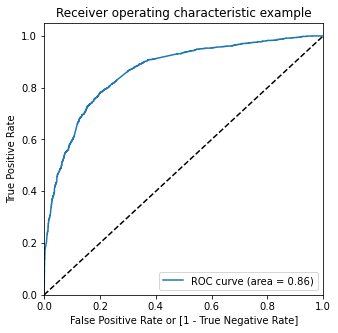

In [77]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [78]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.90,1,1,1,1,1,1,1,1,1,1,0
1,1,0.88,1,1,1,1,1,1,1,1,1,1,0
2,1,0.74,1,1,1,1,1,1,1,1,1,0,0
3,0,0.35,0,1,1,1,1,0,0,0,0,0,0
4,0,0.10,0,1,0,0,0,0,0,0,0,0,0


In [79]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.47   1.00   0.00
0.10  0.10      0.55   0.99   0.16
0.20  0.20      0.69   0.94   0.47
0.30  0.30      0.77   0.89   0.66
0.40  0.40      0.79   0.80   0.77
0.50  0.50      0.79   0.74   0.84
0.60  0.60      0.78   0.67   0.88
0.70  0.70      0.75   0.55   0.92
0.80  0.80      0.72   0.45   0.95
0.90  0.90      0.65   0.28   0.99


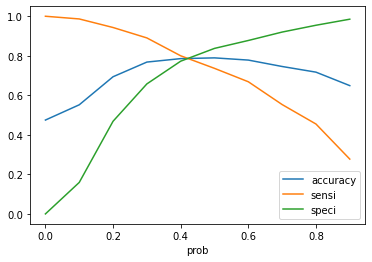

In [80]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [81]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.90,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.88,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.74,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.35,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.10,0,1,0,0,0,0,0,0,0,0,0,0


In [82]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7885088307623519

In [83]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1852,  497],
       [ 449, 1675]], dtype=int64)

In [84]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [85]:
# Calculate Sensitivity

TP/(TP+FN)

0.7886064030131826

In [86]:
# Calculate Specificity

TN/(TN+FP)

0.7884206045125586

This cutoff point seems good to go!

## Making Predictions on the Test Set
Let's now make predicitons on the test set.

In [87]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [88]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable
2938,0.02,0.49,0,0,0,0,0,0,1,0,0,0,0,0,0
4301,0.00,0.14,0,1,0,1,0,0,0,0,0,0,0,0,0
5904,0.01,0.17,0,0,0,1,0,0,0,0,0,0,0,1,0
6881,0.04,0.07,0,0,0,1,1,0,0,0,0,1,0,0,0
5195,0.02,0.57,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [90]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable
2938,1.00,0.02,0.49,0,0,0,0,0,0,1,0,0,0,0,0,0
4301,1.00,0.00,0.14,0,1,0,1,0,0,0,0,0,0,0,0,0
5904,1.00,0.01,0.17,0,0,0,1,0,0,0,0,0,0,0,1,0
6881,1.00,0.04,0.07,0,0,0,1,1,0,0,0,0,1,0,0,0
5195,1.00,0.02,0.57,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,1.00,0.03,0.43,0,0,0,0,0,0,0,0,1,0,0,0,0
7454,1.00,0.00,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0
8201,1.00,0.01,0.56,0,0,0,0,0,0,0,0,0,1,0,0,0
7979,1.00,0.01,0.45,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
# Drop the required columns from X_test as well

X_test_sm.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

NameError: name 'X_test_sm' is not defined

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
